## Data Exploration
------------------------


References: 
1. https://www.kaggle.com/sunnybeta322/nucleus-masking-with-tensorflow-encoder

In [73]:
import numpy as np
import pandas as pd

import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

rcParams["figure.figsize"] = 16, 6

In [74]:
PATH = '~/data/kaggle/bowl2018/'

train1 = pd.read_csv(PATH + "stage1_train_labels.csv")
sample_submission = pd.read_csv(PATH + "stage1_sample_submission.csv")

In [75]:
train1.head()

,ImageId,EncodedPixels
0,00071198d059ba7f5914a526d124d28e6d010c92466da2...,6908 1 7161 8 7417 8 7672 9 7928 9 8184 9 8440...
1,00071198d059ba7f5914a526d124d28e6d010c92466da2...,36269 7 36523 11 36778 13 37033 15 37288 17 37...
2,00071198d059ba7f5914a526d124d28e6d010c92466da2...,19919 6 20174 8 20429 10 20685 11 20941 12 211...
3,00071198d059ba7f5914a526d124d28e6d010c92466da2...,18671 6 18926 8 19181 9 19436 10 19691 11 1994...
4,00071198d059ba7f5914a526d124d28e6d010c92466da2...,40158 3 40413 5 40669 5 40925 5 41182 3


In [76]:
print("There are {} rows of data.".format(train1.shape[0]))

There are 29461 rows of data.


In [77]:
y_train = "EncodedPixels"

In [78]:
def display_image(idx):
    """
    Displays image corresponding to the id
    """
    img = mpimg.imread(PATH+"stage1_train/"+idx+"/"+"images/"+idx+".png")
    return img

In [79]:
def display_mask(idx):
    """
    Displays the masks corersponding to id
    """
    f = os.listdir(PATH+"stage1_train/"+idx+"/masks")[0]
    nim = mpimg.imread(PATH+"stage1_train/"+idx+"/masks/"+f)
    
    for m in os.listdir(PATH+"stage1_train/"+idx+"/masks")[1:]:
        nim += mpimg.imread(PATH+"stage1_train/"+idx+"/masks/"+m)
    
    return nim   

In [80]:
def display_both(idx):
    """
    Display both the mask and the image
    """
    plt.xkcd() # yay!
    fig, ax = plt.subplots(ncols=2)
    ax[0].imshow(display_image(idx))
    ax[1].imshow(display_mask(idx), cmap="copper")
    plt.show()

Image ID: 11824


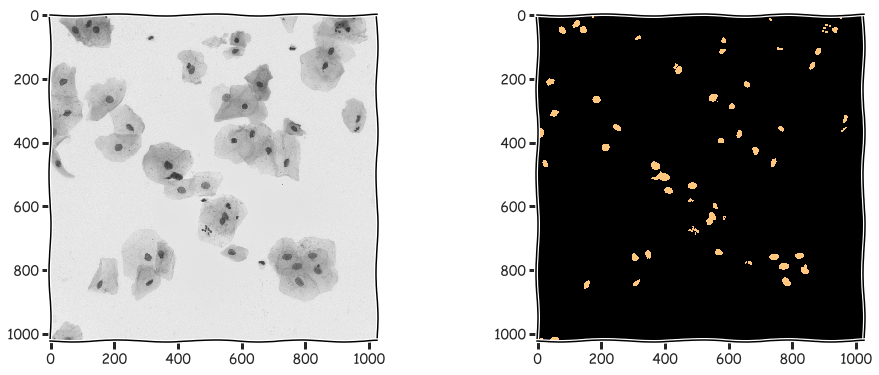

Image ID: 8786


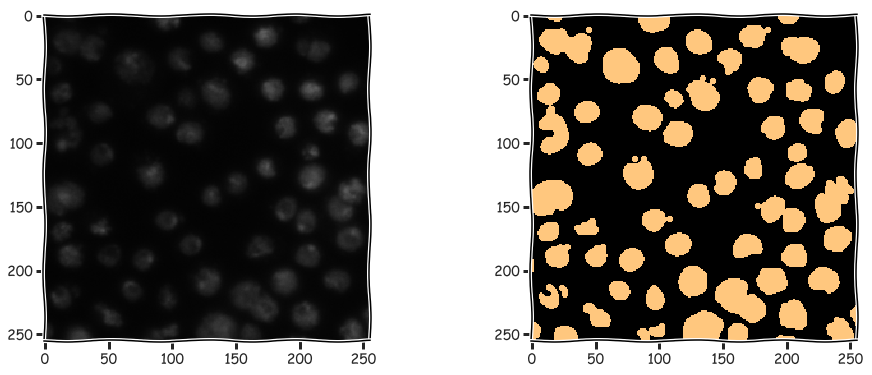

In [81]:
for ind in train1.sample(2)["ImageId"].index:
    print("Image ID:", ind)
    display_both(train1.iloc[ind,0])